In [630]:
import numpy as np      #importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os

In [631]:
df = pd.read_csv("D3.csv")
df.head()    #get first column 
M = len(df)
M

100

In [632]:
#
# Problem 1: Single variable 
#

X1 = df.values[:,0]    #get values from first column (X1)
Y = df.values[:,3]    #get values from last column (Y)
m = len(Y)
print('X1 = ', X1[: 5]) #show the first 5 rows of X1 and Y
print('Y = ', Y[: 5])
print('t = ', t)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
t =  100


Text(0.5, 1.0, 'Scatter plot of X1 vs. Y')

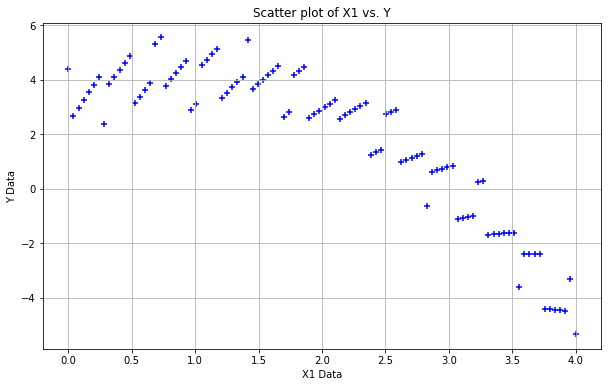

In [633]:
plt.scatter(X1, Y, color = 'blue', marker = '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('X1 Data')
plt.ylabel('Y Data')
plt.title('Scatter plot of X1 vs. Y')

In [634]:
X0 = np.ones((m,1))
X0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [635]:
X1trans = X1.reshape(m,1)    # turn X1 list into an m by 1 array
X1trans[:10]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636]])

In [636]:
# combine X0 and X1 arrays into one big X (aka variable/feature) array
varsX1 = np.hstack((X0,X1trans))    
varsX1[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [637]:
thetasX1 = np.zeros(2)    # thetas initialized to 0
thetasX1

array([0., 0.])

In [638]:
#loss function
def loss(X, Y, theta):
    
    predictions = X.dot(theta)                # h(x) = theta * X
    errors = np.subtract(predictions, Y)      # h(x) - Y
    sqrErrors = np.square(errors)             # (h(x) - Y)^2
    J = 1 / (2*m) * np.sum(sqrErrors)         # J = 1/2m * sigma( (h(x) - Y)^2 )
    return J


In [639]:
cost = loss(varsX1, Y, thetasX1)
print('The cost for the X1 trial thetas is:',cost)

The cost for the X1 trial thetas is: 5.524438459196242


In [640]:
# gradient descent function
def gradient(X, Y, theta, alpha, iterations):
    
    lossHistory = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        derivative = alpha * (1/m) * X.transpose().dot(errors)
        theta = theta - derivative
        lossHistory[i] = loss(X, Y, theta)
    
    return theta, lossHistory


In [641]:
thetasX1 = [0.0, 0.0] 
iterations = 3000      # more iterations -> lower final loss
alpha = 0.1           # higher alpha -> lower final loss
thetasX1, lossHistoryX1 = gradient(varsX1, Y, thetasX1, alpha, iterations)
print('Final thetas:', thetasX1)
print('X1 trial loss history', lossHistoryX1)

Final thetas: [ 5.92794892 -2.03833663]
X1 trial loss history [5.16999006 4.96338989 4.7855721  ... 0.98499308 0.98499308 0.98499308]


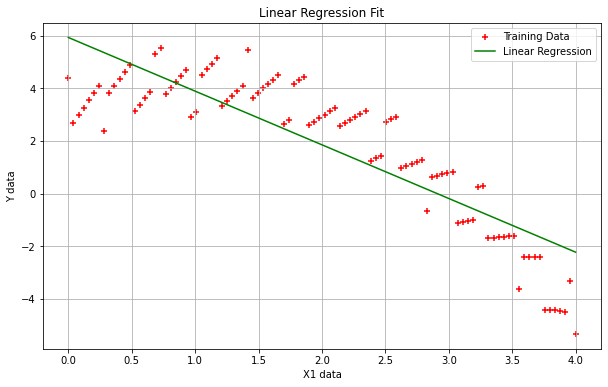

In [642]:
plt.scatter(varsX1[:,1], Y, color = 'red', marker = '+', label = 'Training Data') 
plt.plot(varsX1[:,1],varsX1.dot(thetasX1), color = 'green', label = 'Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X1 data') 
plt.ylabel('Y data') 
plt.title('Linear Regression Fit') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of Gradient Descent for X1')

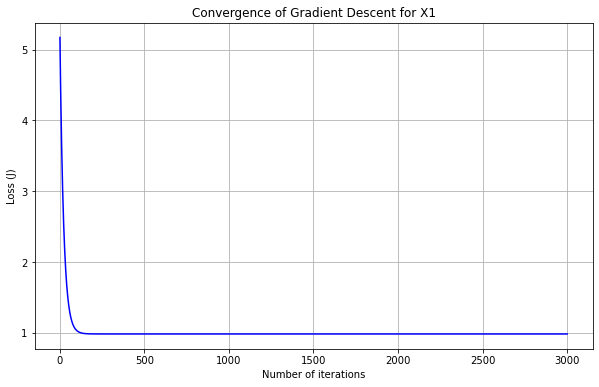

In [643]:
plt.plot(range(1, iterations + 1), lossHistoryX1, color = 'blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Convergence of Gradient Descent for X1') 

In [644]:
# Begin X2 trial 

X2 = df.values[:,1]    # get values from second column (X2)
X2trans = X2.reshape(m,1)    # turn X2 list into an m by 1 array
X2trans[:10]

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454546]])

In [645]:
# combine X0 and X2 arrays into one big X (aka variable/feature) array
varsX2 = np.hstack((X0,X2trans))    
varsX2[:5]

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [646]:
thetasX2 = [0.0, 0.0]
cost2 = loss(varsX2, Y, thetasX2)
print('The cost for the X2 trial thetas is:',cost2)

The cost for the X2 trial thetas is: 5.524438459196242


In [647]:
iterations = 1500
alpha = 0.1
thetasX2, lossHistoryX2 = gradient(varsX2, Y, thetasX2, alpha, iterations)
print('Final thetas:', thetasX2)
print('X2 trial loss history', lossHistoryX2)

Final thetas: [0.73606043 0.55760761]
X2 trial loss history [3.90731819 3.66528504 3.62832072 ... 3.59936602 3.59936602 3.59936602]


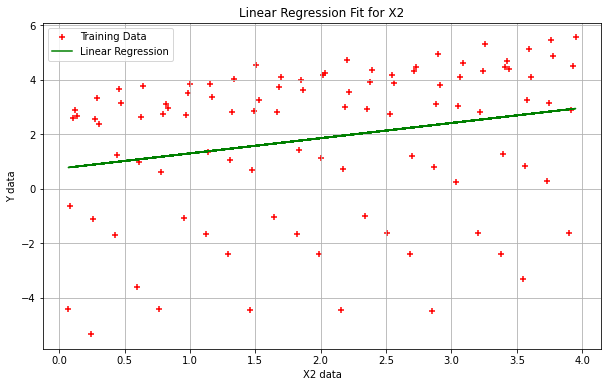

In [648]:
plt.scatter(varsX2[:,1], Y, color = 'red', marker = '+', label = 'Training Data') 
plt.plot(varsX2[:,1],varsX2.dot(thetasX2), color = 'green', label = 'Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X2 data') 
plt.ylabel('Y data') 
plt.title('Linear Regression Fit for X2') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of Gradient Descent for X2')

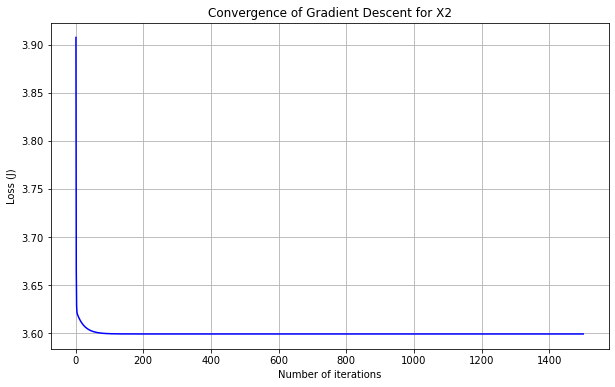

In [649]:
plt.plot(range(1, iterations + 1), lossHistoryX2, color = 'blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Convergence of Gradient Descent for X2') 

In [650]:
# Begin X3 trial 

X3 = df.values[:,2]    # get values from second column (X3)
X3trans = X3.reshape(m,1)    # turn X3 list into an m by 1 array
X3trans[:10]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [651]:
# combine X0 and X3 arrays into one big X (aka variable/feature) array
varsX3 = np.hstack((X0,X3trans))    
varsX3[:5]

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [652]:
thetasX3 = [0.0, 0.0]
cost3 = loss(varsX3, Y, thetasX3)
print('The cost for the X3 trial thetas is:', cost3)

The cost for the X3 trial thetas is: 5.524438459196242


In [653]:
iterations = 1500
alpha = 0.1
thetasX3, lossHistoryX3 = gradient(varsX3, Y, thetasX3, alpha, iterations)
print('Final thetas:', thetasX3)
print('X3 trial loss history', lossHistoryX3)

Final thetas: [ 2.8714221  -0.52048288]
X3 trial loss history [4.66843939 4.49602325 4.43685075 ... 3.62945112 3.62945112 3.62945112]


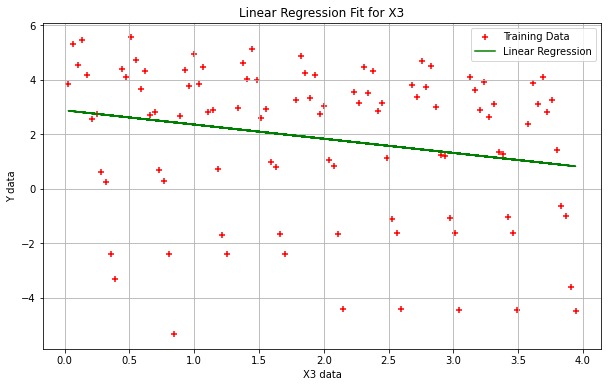

In [654]:
plt.scatter(varsX3[:,1], Y, color = 'red', marker = '+', label = 'Training Data') 
plt.plot(varsX3[:,1],varsX3.dot(thetasX3), color = 'green', label = 'Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('X3 data') 
plt.ylabel('Y data') 
plt.title('Linear Regression Fit for X3') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of Gradient Descent for X3')

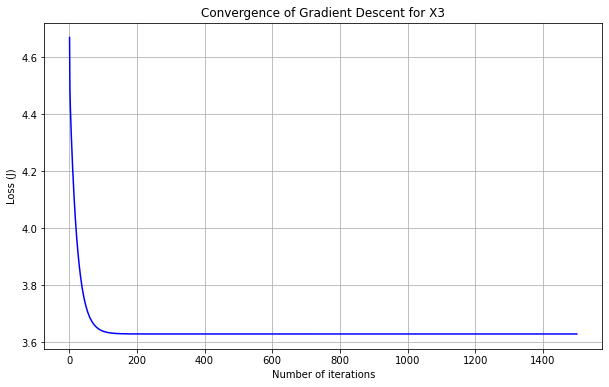

In [655]:
plt.plot(range(1, iterations + 1), lossHistoryX3, color = 'blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Convergence of Gradient Descent for X3') 

In [656]:
#
# Problem 2: All variables X1, X2, and X3 at once
#

varsTotal = np.hstack((X0, X1trans, X2trans, X3trans))
varsTotal[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [657]:
thetasTotal = [0.0, 0.0, 0.0, 0.0]
thetasTotal

[0.0, 0.0, 0.0, 0.0]

In [658]:
# loss function
def loss(X, Y, theta):
    
    predictions = X.dot(theta)                # h(x) = theta * X
    errors = np.subtract(predictions, Y)      # h(x) - Y
    sqrErrors = np.square(errors)             # (h(x) - Y)^2
    J = 1 / (2*m) * np.sum(sqrErrors)         # J = 1/2m * sigma( (h(x) - Y)^2 )
    return J


In [659]:
cost = loss(varsTotal, Y, thetasTotal)
print('The cost for the combined X thetas is:',cost)

The cost for the combined X thetas is: 5.524438459196242


In [660]:
# gradient descent function
def gradient(X, Y, theta, alpha, iterations):
    
    lossHistory = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        derivative = alpha * (1/m) * X.transpose().dot(errors)
        theta = theta - derivative
        lossHistory[i] = loss(X, Y, theta)
    
    return theta, lossHistory


In [661]:
iterations = 1500    # doesn't have a huge impact after 1500 but lower values give suboptimal loss
alpha = 0.1         # lower value gives suboptimal loss history 
thetasTotal, lossHistoryTotal = gradient(varsTotal, Y, thetasTotal, alpha, iterations)
print('Final thetas:', thetasTotal)
print('Combined X loss history', lossHistoryTotal)

Final thetas: [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
Combined X loss history [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]


Text(0.5, 1.0, 'Convergence of Gradient Descent')

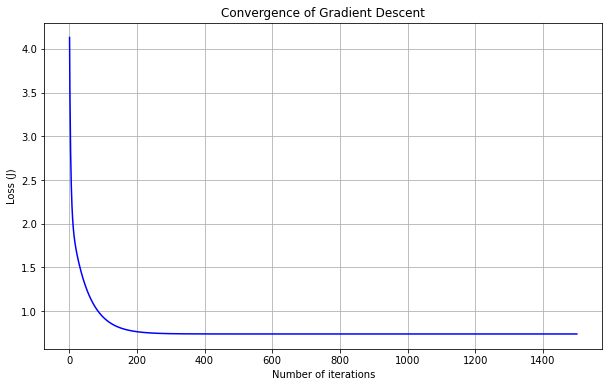

In [662]:
plt.plot(range(1, iterations + 1), lossHistoryTotal, color = 'blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Loss (J)') 
plt.title('Convergence of Gradient Descent') 

In [663]:
thetasTotal

array([ 5.31416563, -2.00371905,  0.53256359, -0.26560164])

In [664]:
# Problem 2 part 4
x1 = [1,1,1] 
y1 = thetasTotal[0]*x1[0] + thetasTotal[1]*x1[1] + thetasTotal[2]*x1[2] + thetasTotal[3]

x2 = [2,0,4] 
y2 = thetasTotal[0]*x2[0] + thetasTotal[1]*x2[1] + thetasTotal[2]*x2[2] + thetasTotal[3]

x3 = [3,2,1] 
y3 = thetasTotal[0]*x3[0] + thetasTotal[1]*x3[1] + thetasTotal[2]*x3[2] + thetasTotal[3]

print('y1 =',y1)
print('y2 =',y2)
print('y3 =',y3)

y1 = 3.577408529345461
y2 = 12.49298398163733
y3 = 12.202020733827325
